<img src="blinking-vortex.png" align="center"/>

# Lab 1: Fundamentals

In this lab, we will explore some concepts from Topic 1: Fundamentals

- Advective derivative
- Lagrangian vs Eulerian frames
- Conservation laws

We will also introduce some basic Python tools, such as plotting and data analysis. 

To use this notebook, you will need Python3 installed on your local machine. 

# Background

## Blinking vortex flow

The example we will study in depth is the *blinking vortex flow* (Aref, 1984). This 2D time-dependent flow is given by two vortices that alternately "blink" on and off with period $T$. Despite its simplicity, the blinking vortex flow produces very complex patterns of advection. In fact, it is a prototypical example of *chaotic advection*, a simple flow that produces chaos. 

For a single vortex centred at $(0,0)$, the flow is given by

$$
u = \frac{K y}{x^2 + y^2}, \qquad v = -\frac{K x}{x^2 + y^2}.
$$

The strength of the vortex is given by $K$. For positive $K$, the vortex rotates clockwise; for negative $K$, the vortex rotates anticlockwise. 

The blinking vortex flow alternates the vortex center between $(\pm a, 0)$. Thus, for $0 \le t < T/2$, the vortex is centered at $(-a, 0)$: 

$$
u = \frac{K y}{(x+a)^2 + y^2}, \qquad v = -\frac{K (x + a)}{(x + a)^2 + y^2}, \qquad 0 \le t < T/2,
$$

while, for $T/2 \le t < T$ the vortex is centered at $(+a,0)$: 

$$
u = \frac{K y}{(x-a)^2 + y^2}, \qquad v = -\frac{K (x - a)}{(x - a)^2 + y^2}, \qquad T/2 \le t < T.
$$

This pattern then repeats with period $T$. 

## Particle advection

Given this prescribed flow $u(x,y,t), v(x,y,t)$, we can advect particles by solving the following set of ODEs for the particle position $x_p(t), y_p(t)$

$$
\frac{d x_p}{dt} = u( x_p(t), y_p(t), t),
$$

$$
\frac{d y_p}{dt} = v( x_p(t), y_p(y), t).
$$

In addition we have the initial condition:

$$
x_p(0) = x_0, \qquad y_p(0) = y_0,
$$

that is, the particle is initially released at the position $x_0, y_0$. 

For the simple flow we have prescribed, we could easily solve this set of equations analytically: the particle trajectories are just circles (try to prove this yourself). However, this quickly gets complicated when you include time-dependence in the flow, even very elementary time-dependence as in this case. So instead we will use a well-known numerical scheme to solve the ODEs: the Runge-Kutta fourth order (RK4) timestepper. 

## References

Aref, H. (1984). Stirring by Chaotic Advection. Journal of Fluid Mechanics 143: 1-21. 

Code Academy: [Learn Python](https://www.codecademy.com/learn/learn-python). A free web-based tutorial with interactive python terminal. Highly recommended. 

# Setting up the experiment

## An introduction to Python

In this course, we will use [Python](https://www.python.org/) to run fluid dynamics simulations, analyze output, and plot figures and movies. Python is free, flexible, easy to use, and has tons of online resources for beginners. If you have a question about Python, my default answer will be "have you Googled it?"

You do not need to be fluent in Python or any other programming language for this course. We will run Python from within these notebooks, and you will get lots of guidance. You are also encouraged to complete this [free online tutorial](https://www.codecademy.com/learn/learn-python) to familiarise yourself with Python syntax.

### Jupyter notebook

We will run the python labs in [Jupyter notebook](http://jupyter.org/). Jupyter notebook is an interective, web-based, computational environment. Within a notebook you can display text, mathematical notation, images, etc, using [Markdown](https://www.markdownguide.org/). For example:

#### World's most awesome equations: 

- Newton's second law: $F = m \dot{v}$. 
- Euler's equation: $e^{\mathrm{i} \pi} + 1 = 0$. 
- Wave equation ("_gnarly dude!_"): 
$$
\frac{\partial^2 f}{\partial t^2} = c^2 \frac{\partial^2 f}{\partial x^2}.
$$


If you double-click any cell, you can see the Markdown code used to create it. 

Jupyter notebook also allows you to use "cells" of python code that be executed in real time. 

To see this in action, move down to the next cell and enter the following python code: 

```
string = "Hello world!"
print(string)
```

When you are finished, press **SHIFT + ENTER** to run the cell (or click **Run** in the menu above). 

In [ ]:
# This is a comment reminding you to enter your python code below. Don't forget to press shift + enter to run!


Congratulations! You are now a pythonista. Variables carry over from cell to cell, so you can build complex scripts by sequentially running cells one after another. 

Now create a new cell by clicking on the "+" button in the menu above. Make sure that the cell type is "Code" in the drop down menu. Navigate to the new cell and enter the following python code: 

```
longer_string = string + " spam! Spam! SPAM!"
print(longer_string)
```

Don't forget to **SHIFT + ENTER** to run the cell. 


## Libraries

Python makes extensive use of freely available, open source *libraries*, which contain tonnes of useful functions etc that you can make use of. The following python code calls two standard libraries: `numpy` (pronounced "numb pie"), which contains useful functions for carrying out numerics, and `matplotlib`, which allows us to plot data.

Since we will be using these libraries repeatedly, we will abbreviate their names to `np` and `plt`, respectively.

Finally, the last line instructs `matplotlib` to plot figures in the Jupyter notebook, just below the cell that calls it. That way, you will be able to view and save figures within the notebook. 

**Move to the next cell by pressing DOWN, then press SHIFT + ENTER to run (or click "Run" in the menu above)**

In [1]:
# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Jupyter notebook
%matplotlib inline

## Variables, arrays, and indexing

The first thing we need to do is define a numerical grid. We will do this using the `numpy` functions `linspace` and `meshgrid`. Thus, when we call them, we will use the alias we defined for this library, `np`, followed by a period `.` followed by the particular function we want from the library, e.g. `np.linspace`.

First, we create a vector `xv` of `2n+1` equally spaced gridpoints between $x = -1$ and $x = 1$. Again, press **shift + enter** to run the following cell. 

In [2]:
# Grid
n = 50
xv = np.linspace(-1,1,2*n+1)

print(xv.shape)
print(xv[0:10])
print(xv[-10:])

(101,)
[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82]
[0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


The command `print(xv.shape)` prints the dimensions of the array `xv`. In this case, it is a 1D array with `2n+1` elements, so the dimensions are $(2n+1,)$. Notice that the second dimension is simply blank, rather than `1`. 

The commands `print(xv[0:10])` and `print(xv[-10:])` print the first and last ten elements of the array. Indexing in python is indicated using square brackets `[...]` and is referenced to the first element (for positive indices) or the last element (for negative indices). Thus, `xv[0:10]` can be read as: "first + 0 elements to first + 10 elements", and `xv[-10:]` can be read as: "last - 10 elements to last element". 

Next we will define 2D arrays `xx` and `yy` using the function `meshgrid`. 

In [3]:
xx,yy = np.meshgrid(xv,xv,indexing='ij')

print(xx.shape)
print(yy.shape)

print(xx[0:10,0:10])
print(yy[0:10,0:10])

(101, 101)
(101, 101)
[[-1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.  ]
 [-0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98]
 [-0.96 -0.96 -0.96 -0.96 -0.96 -0.96 -0.96 -0.96 -0.96 -0.96]
 [-0.94 -0.94 -0.94 -0.94 -0.94 -0.94 -0.94 -0.94 -0.94 -0.94]
 [-0.92 -0.92 -0.92 -0.92 -0.92 -0.92 -0.92 -0.92 -0.92 -0.92]
 [-0.9  -0.9  -0.9  -0.9  -0.9  -0.9  -0.9  -0.9  -0.9  -0.9 ]
 [-0.88 -0.88 -0.88 -0.88 -0.88 -0.88 -0.88 -0.88 -0.88 -0.88]
 [-0.86 -0.86 -0.86 -0.86 -0.86 -0.86 -0.86 -0.86 -0.86 -0.86]
 [-0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84]
 [-0.82 -0.82 -0.82 -0.82 -0.82 -0.82 -0.82 -0.82 -0.82 -0.82]]
[[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82]
 [-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82]
 [-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82]
 [-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82]
 [-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82]
 [-1.   -0.98 -0.96 -0.94 -0.92 

The array `xx` is an $2n+1 \times 2n+1$ matrix in which each row is the corresponding value of `xv`. Likewise, the array `yy` is an $2n+1 \times 2n+1$ matrix with each column having the corresponding value of `xv`. 

Let's try plotting a simple function of x and y using the arrays `xx` and `yy`. The function we will use is 

$$
f = \sin  (\pi x) 
$$

Both the sine function and the constant pi are part of the `numpy` library, so we call the using `np.sin` and `np.pi`, respectively. 

In [4]:
# define function
f = np.sin(np.pi*xx)

We will make a 2D colorplot of this function using `plt.pcolormesh`, as well as a 1D plot of a slice of the function using `plt.plot`. We will also use some other functions from `matplotlib` to control the appearance of the figure, such as `subplot`, `title`, `xlabel`, etc. 

(-1.1, 1.1)

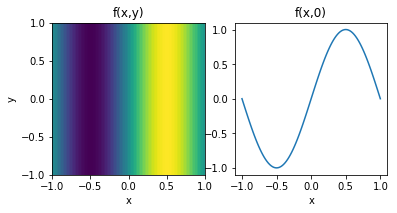

In [5]:
# plot 2D colorplot
plt.subplot(1,2,1)
plt.pcolormesh(xx, yy, f)
plt.title('f(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

# plot 1D slice along y = 0
plt.subplot(1,2,2)
plt.plot(xv,f[:,n])
plt.title('f(x,0)')
plt.xlabel('x')
plt.axis('square')
plt.ylim(-1.1,1.1)

--------------

### Now try it yourself

- Modify the function `f` above so that it is $f = \cos (\pi y)$ and plot a 2D colormap of the function. To do this, you will need to run (**shift + enter**) both cells: the cell that defines `f` and the cell that plots `f`. 

- How should you change the 1D plot so that it shows a slice along $x = 0$ instead of $y = 0$? 

- Try plotting a more complication function like $f = \sin (\pi x) \cos (\pi y$). 

------------------

## Functions

Now we will define a function that will return the value of the prescribed velocity field $U, V$ at the position of each particle. Then we can define a function for the right-hand side of the particle advection equation

$$
\frac{d x}{d t} = U(x,y,t), \qquad \frac{d y}{d t} = V(x,y,t).
$$

We first define a function called `vortex` that accepts the following arguments

- `data` : contains the current positions of the particles, `X` and `Y`
- `x0` and `y0` : the location of the center of the vortex
- `K` : the strength of the vortex
- `eps` : a parameter that prevents the function from returning `NaN` for particles released at the center of the vortex (where the velocity $\rightarrow \infty$). 

Don't forget to press **shift + enter** to run the code. No output will be printed when you do this, because we are just defining some functions. But we will take a look at some output in a moment. 

In [6]:
def vortex(data, x0, y0, K, eps):
    X, Y = data
    Xc, Yc = X-x0, Y-y0
    U = K*Yc/(Xc**2 + Yc**2 + eps)
    V = -K*Xc/(Xc**2 + Yc**2 + eps) 
    return np.stack([U, V])

Notice that Python doesn't need to close the definition with an `end` statement. Instead, Python uses indentation for a block of code like a definitition, an `if` statement, a `for` loop, etc. 

The function returns the value of the velocities $U$ and $V$ at the positions $X$ and $Y$. It returns this data in the form of a multi-dimensional array using a handy function called `stack`, which is part of the `numpy` library. 

Now that we have defined a function that creates a generalized vortex, we can use it to define the right-hand side of the particle advection equation. We will call this function `RHS`, and it accepts the following arguments

- `t` : the current time (in the simulation)
- `data` : the current positions of the particles, i.e. `X` and `Y`

In [7]:
def RHS(t,data):
    x0, y0 = -.25, 0,
    x1, y1 = .25, 0.
    K = 1
    eps = .01
    if np.sin(2*np.pi*t) > 0: 
        return vortex(data,x0,y0,K,eps)
    else: 
        return vortex(data,x1,y1,K,eps)

The function defines the centers of our two blinking vortices as $(x_0, y_0) = (-0.25,0)$ and $(x_1, y_1) = (0.25, 0)$. The values of the parameters `K` and `eps` are chosen to be 1 and 0.01 respectively. To make the vortices periodically "blink" on and off, it uses the sine function $\sin ( 2 \pi t)$: 

- when $\sin ( \pi t)$ is positive (i.e. when $0 < t < 1/2$) the vortex on the left is turned on
- when $\sin ( \pi t)$ is zero or negative (i.e. when $1/2 \le t \le 1$) the vortex on the right is turned on

This pattern then repeats with period $T = 1$. 

The function `RHS` makes use an `if` statement to determine which vortex to switch on. If the condition specified by the `if` statement is not satisfied, the function executes the `else` statement instead. As with `def`, we don't need to use an `end` statement: we just use another indentation to indicate an `if...else` block.   

## Analysis of the velocity fields

Now we can plot the model flow field. We will do this by evaluating `RHS` at every grid point `xx`, `yy` at times `t = 0.25` and `t = 0.75`. We will then plot 2D colormaps speed (magnitude of the velocity). 

(-1.0, 1.0, -1.0, 1.0)

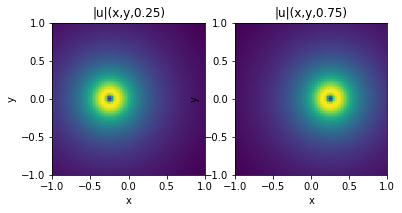

In [8]:
# Create the vortex at t = 0.25, 0.75
data = np.stack([xx,yy])
U0,V0 = RHS(0.25,data)
U1,V1 = RHS(0.75,data)

# Speed (magnitude of velocity)
speed0 = np.sqrt(U0**2 + V0**2)
speed1 = np.sqrt(U1**2 + V1**2)

# Plot velocity field for each blink
plt.subplot(1,2,1)
plt.pcolormesh(xx,yy,speed0)
plt.title('|u|(x,y,0.25)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

plt.subplot(1,2,2)
plt.pcolormesh(xx,yy,speed1)
plt.title('|u|(x,y,0.75)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

Notice that the speed goes to zero at the center of each vortex. This is because the parameter `eps` regularizes the singularity at the center. This can be more easily seen in 1D plots of the tangential velocities as functions of $x$. 

We will set the limits of these plots using the maximum value of $V$, using the functions `flatten()` (to convert an array into a 1D vector) and `max` (to find the largest value of a 1D vector). 

[-1, 1, -4.97737556561086, 4.97737556561086]

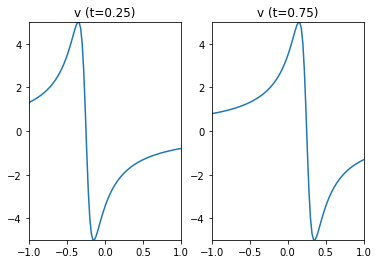

In [9]:
# find max value of V
Vmax = max(V0.flatten())

# Plot 1D slices of V for each blink
plt.subplot(1,2,1)
plt.plot(xv,V0[:,n])
plt.title('v (t=0.25)')
plt.axis([-1,1,-Vmax,Vmax])

plt.subplot(1,2,2)
plt.plot(xv,V1[:,n])
plt.title('v (t=0.75)')
plt.axis([-1,1,-Vmax,Vmax])

----------------

### Now try it yourself

- Try changing the parameters `K` and `eps` in the definition of the function `RHS`. How does this change the flow? 
- Derive (by hand) the vorticity of the flow $\omega = \partial_x V - \partial_y U$. Use the expression to define a new function, `vorticity`, and plot 2D colorplots of the vorticity for each blink. 
- How could you change the blinking vortex flow so that the two vortices rotate in opposite directions?

-----------------

# Experiment

## Particle advection

Now we are ready to move a particle around with the prescribed flow field. To do this, we will use a Runge-Kutta fourth-order (RK4) time-stepper. If you are unfamiliar with RK4, you should spend some time googling it. 

The python code for RK4 is below. You don't need to understand everything that this code does, just that it creates a new function called `RK4` that accepts the following arguments

- `data` : contains the current positions of the particles, `X` and `Y`
- `RHS` : a pointer to the function we already defined for the RHS of the particle advection equations
- `save_freq` : determines how often to save the output of the advection scheme

**Execute the following cells using SHIFT + ENTER**

### RK4 Timestepper

In [10]:
class RK4():
    """Class for making simulation objects."""
    
    def __init__(self,start,forcing,time=0,save_freq=False):
        """Create simulation timestepper object."""
        self.times = [time]
        self.iters = 0
        self.data = start
        self.RHS  = forcing
        self.grids = start
        
        t = self.now()
        X, Y = self.data
        U, V = self.RHS(t,self.data)
        self.save_freq = save_freq
        self.save_data = np.array([X,Y,U,V])[None,...]
        self.save_times = [time]
        
    def __call__(self,dt):
        """RK4 Time step of size dt."""
        x = self.data
        f = self.RHS
        t = self.now()
        self.times += [ t + dt]
        self.iters += 1

        k1 = f(t,x)
        k2 = f(t+dt/2,x+(dt/2)*k1)
        k3 = f(t+dt/2,x+(dt/2)*k2)
        k4 = f(t+dt,   x+dt*k3)
        
        self.data = x + (dt/6)*( k1 + 2*k2 + 2*k3 + k4 )
        if save_freq and self.iters % self.save_freq == 0: self.save()
        
    def state(self):
        """Return current time and data."""
        return self.times[-1], self.data
    
    def now(self):
        """Return current time."""
        return self.times[-1]
    
    def save(self):
        """Store data."""
        t = self.now()
        X, Y = self.data
        U, V = self.RHS(t, self.data)
        save_arr = np.array([X,Y,U,V])[None,...]
        self.save_times = np.append(self.save_times,t)
        self.save_data = np.append(self.save_data, save_arr, axis=0)
        print('Saved data at timestep {:d}'.format(self.iters))

To test this, let's start with a single particle released from an initial position ($X_0, Y_0) = (0, 0)$ at time $t = 0$. From this, we create the initial `data` using `np.stack` and evaluate the initial velocity at the release position. 

We will also set some parameters for the timestepping scheme and how often to save data to memory:
- `dt` : the timestep used
- `iterations` : the total number of timesteps to take
- `save_freq` : number of timesteps to take before saving the data

In [11]:
# Initial Data
X0,Y0 = 0, 0
data = np.stack([X0,Y0])
U0,V0 = RHS(0,data)

# Timestepping and saving parameters
dt = 0.0005
save_freq = 50
iterations = 20000

We're ready to go! Execute the following cell to call the timestepper and loop for the number of timesteps given by `iterations`. You should see output printed to the screen showing you that the code is running. 

In [12]:
# Timestepper
advection = RK4(data,RHS,save_freq=save_freq)

# Timestepping loop
for _ in range(iterations): advection(dt)

Saved data at timestep 50
Saved data at timestep 100
Saved data at timestep 150
Saved data at timestep 200
Saved data at timestep 250
Saved data at timestep 300
Saved data at timestep 350
Saved data at timestep 400
Saved data at timestep 450
Saved data at timestep 500
Saved data at timestep 550
Saved data at timestep 600
Saved data at timestep 650
Saved data at timestep 700
Saved data at timestep 750
Saved data at timestep 800
Saved data at timestep 850
Saved data at timestep 900
Saved data at timestep 950
Saved data at timestep 1000
Saved data at timestep 1050
Saved data at timestep 1100
Saved data at timestep 1150
Saved data at timestep 1200
Saved data at timestep 1250
Saved data at timestep 1300
Saved data at timestep 1350
Saved data at timestep 1400
Saved data at timestep 1450
Saved data at timestep 1500
Saved data at timestep 1550
Saved data at timestep 1600
Saved data at timestep 1650
Saved data at timestep 1700
Saved data at timestep 1750
Saved data at timestep 1800
Saved data a

Saved data at timestep 15500
Saved data at timestep 15550
Saved data at timestep 15600
Saved data at timestep 15650
Saved data at timestep 15700
Saved data at timestep 15750
Saved data at timestep 15800
Saved data at timestep 15850
Saved data at timestep 15900
Saved data at timestep 15950
Saved data at timestep 16000
Saved data at timestep 16050
Saved data at timestep 16100
Saved data at timestep 16150
Saved data at timestep 16200
Saved data at timestep 16250
Saved data at timestep 16300
Saved data at timestep 16350
Saved data at timestep 16400
Saved data at timestep 16450
Saved data at timestep 16500
Saved data at timestep 16550
Saved data at timestep 16600
Saved data at timestep 16650
Saved data at timestep 16700
Saved data at timestep 16750
Saved data at timestep 16800
Saved data at timestep 16850
Saved data at timestep 16900
Saved data at timestep 16950
Saved data at timestep 17000
Saved data at timestep 17050
Saved data at timestep 17100
Saved data at timestep 17150
Saved data at 

## Plotting the data

Now let's take a look at the trajectory of the particle. 

(-1, 1)

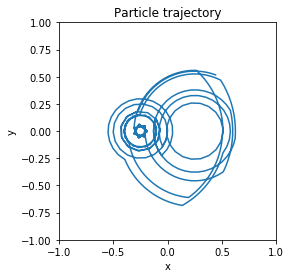

In [13]:
# grab the position and time data saved in the object `advection`
save_data = advection.save_data
save_times = advection.save_times

# particle position is the first (0) and second (1) column of the array
X = save_data[:,0]
Y = save_data[:,1]

# plot the particle trajectory
plt.plot(X,Y)
plt.title('Particle trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)

Next let's check that these trajectories make sense. For each "blink" the particle will move in a circular orbit around the vortex center. So if we plot the distance of the particle from center of the vortex that is "on" at any given time, it should be a piecewise constant function. 

First define a function to calculate the distance of the particle from the vortex that is currently "on". We will use a similar structure to `RHS`, using a conditional `if ... ` block. However, instead of evaluating the function for a single instant of time, we want to run through a vector of times. We do this using a `for ...` loop. 

In [14]:
def distance_from_vortex(t,data):
    X,Y = data
    x0, y0 = -.25, 0
    x1, y1 = .25, 0
    dist = [None]
    
    for i in range(1,len(t)):
        if np.sin(2*np.pi*t[i]) > 0:
            dist = np.append(dist,np.sqrt((X-x0)**2 + (Y-y0)**2))
        else: 
            dist = np.append(dist,np.sqrt((X-x1)**2 + (Y-y1)**2))
        return dist[1:]

Now plot the distance as a function of time using our newly created function `distance_from_vortex`. 

Text(0.5,1,'Distance from active vortex')

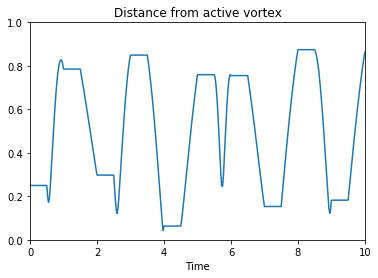

In [15]:
# Create an array using the particle position at each time
data = np.stack([X,Y])

# calculate the distance from the active vortex
dist = distance_from_vortex(save_times,data)

# plot as a function of time
plt.plot(save_times,dist)
plt.xlim([0,10])
plt.ylim([0,1])
plt.xlabel('Time')
plt.title('Distance from active vortex')

You should see that the distance from the vortex is typically constant, and then undergoes a step-change as the other vortex switches on instead. However, there might be some errors, associated with the time-stepping algorithm, that results in some "noise" in the trajectory.

-----------------

### Now try it yourself

- Rerun the simulations using other values of `x0`, `y0` to see how the initial position of the particle changes its subsequent trajectory. 
- Try changing the value of the timestep `dt` to see how this affects the accuracy of the trajectories. 

-----------------

## Chaotic advection

The blinking vortex flow is a prototype for "chaotic advection": particle trajectories are highly chaotic, meaning that they are very sensitive to where they are initially released. 

To explore this, we will compare the trajectories of two particles initially released very close to each other. We can do this with the particle advection code we have, but for two particles instead of one. 

In [ ]:
# Initial Data
X0,Y0 = (0,0), (-0.01, 0.01)
data = np.stack([X0,Y0])
U0,V0 = RHS(0,data)

# Timestepping and saving parameters
dt = 0.0005
save_freq = 50
iterations = 20000

All we have changed here is that we now have particles starting at $(X_0,Y_0) = (0, -0.1)$ and $(X_0,Y_0) = (0, 0.1)$. We proceed with the advection algorithm exactly as before, and plot the resulting trajectories. 

In [ ]:
# Timestepper
advection = RK4(data,RHS,save_freq=save_freq)

# Timestepping loop
for _ in range(iterations): advection(dt)

In [ ]:
# grab the position and time data saved in the object `advection`
save_data = advection.save_data
save_times = advection.save_times

In [ ]:
# grab the position and time data saved in the object `advection`
save_data = advection.save_data
save_times = advection.save_times

# position of first (0) and second (1) particle
X1 = save_data[:,0,0]
Y1 = save_data[:,1,0]
X2 = save_data[:,0,1]
Y2 = save_data[:,1,1]

# plot the particle trajectories
plt.plot(X1,Y1)
plt.plot(X2,Y2)
plt.title('Particle trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)

Let's plot the separation between the two particles as a function of time.

In [ ]:
# separation between the particles
sep = np.sqrt((X1-X2)**2 + (Y1-Y2)**2)

# plot separation as a function of time
plt.plot(save_times,sep)
plt.title('Particle separation')
plt.xlabel('Time')
plt.xlim(0,10)

Although the particles start out close together, they will quickly separate. This is a hallmark of chaotic advection. 

---------------

### Now try it yourself
 
- Change the initial positions so the particles are closer together when they are released. Does the growth in the separation change? What if the particles start further away from each other? 
- **Challenge:** Modify the code to advect four particles initially released at the vertices of a square centred on the origin, i.e.

$$
(X_0, Y_0) = (-0.1, -0.1), (-0.1, 0.1), (0.1,-0.1), (-0.1,-0.1).
$$

Advect all four particles, and then calculate the separation rates of each particle pair (top, left, right, bottom). Plot the separations, averaged over particle pairs, as a function of time. 

------------------

## Eulerian and Lagrangian fields

As a final demonstration, we will advect a large number of particles. In fact, we release a particle at every gridpoint. The subsequent evolution of the particles will give us a Lagrangian field representation of the flow, that is, from the perspective of particles moving with the flow. 

We will make some pretty plots and stitch them together to make some movies. So the first thing you should do is create a new directory called `plots` in the notebook directory. 

Next we'll tell python where to find that folder, and import some useful tools for plotting colorbars. 

In [ ]:
# Directory to store plots - you need to create this folder in the notebook directory!
plot_dir = 'plots'

# useful tools for formatting colorbars
from mpl_toolkits.axes_grid1 import make_axes_locatable 

Now let's define the initial particle positions to be the locations of the gridpoints, which we defined using `xx` and `yy`. 

In [ ]:
# Grid of particles
n = 100
xv = np.linspace(-0.5,0.5,2*n+1)
xx,yy = np.meshgrid(xv,xv,indexing='ij')

# Initial Data
X0,Y0 = xx,yy
data = np.stack([X0,Y0])
U0,V0 = RHS(0,data)

# Timestepping and saving parameters
dt = 0.0005
save_freq = 100
iterations = 10000

Now run the time-stepping algorithm. This might take a little bit longer, because we are advecting a lot more particles. 

In [ ]:
# Timestepper
advection = RK4(data,RHS,save_freq=save_freq)

# Timestepping loop
for _ in range(iterations): advection(dt)

To visualize the data, we will use scatter plots (`plt.scatter`) to plot the current position of each particle. But we will colour the particles using their initial $x$-position. 

This can take a little while to run --- longer than the simulation itself! You can look at the figures one-by-one in the directory `plots` to see how the particles evolve in time. 

In [ ]:
# Plot the current positions in the Eulerian frame (coloured by initial x-position)

save_data = advection.save_data

step = 1
sel = (slice(None,None,step),slice(None,None,step))

for i in range(len(save_data)):
    X, Y = save_data[i,:2,...]
    Xf, Yf = X[sel].flatten(), Y[sel].flatten()
    
    # Plot current position in Eulerian frame
    fig, ax = plt.subplots()
    ax.scatter(Xf, Yf, c=xx.flatten(), s=1, edgecolors="none")
    ax.set(aspect=1,xlabel='$x$',ylabel='$y$',xlim=[-1,1],ylim=[-1,1])
    plt.savefig(plot_dir+'/blinking-Eulerian_{:0>3d}.png'.format(i),dpi=200,bbox_inches='tight')
    plt.close()
    print('Saved Eulerian snapshot {:d}'.format(i))

### Making movies (to finish)

The previous cell created a series of `png` files and placed them in the directory `plots`, e.g.

```
plots/blinking-Eulerian_000.png
plots/blinking-Eulerian_001.png
plots/blinking-Eulerian_002.png
...
```

You can look at individual images by entering the following in the unix command line

```
display plots/blinnking-Eulerian_000.png
```

We'd like to be able to bundle together these image files into a movie. We will do this using a handy little script called `ffmpeg`. This script needs to be run in Linux, but one of the cool things about Jupyter notebooks is that you can run shell commands directly from a cell. 

The following function launches a shell using the command `system`, which is part of the library `os`. It then looks for all images that match the pattern `image_filenames` and stitches them together to create a movie called `movie-filename`. The last number, `framerate` the frame rate to use, i.e. the number of images to show per second. 

In [ ]:
def save_movie(image_filenames,movie_filename,framerate):
    os.system('ffmpeg -r ' + str(framerate) + ' -i ' + image_filenames + ' -vcodec mpeg4 -y ' + movie_filename)
    #os.system("ffmpeg -r 30 -i img%01d.png -vcodec mpeg4 -y movie.mp4")

To use this function, we need import the library `os`. To watch the movie, open the current working directory and click on `blinking-Eulerian.mp4`. 

In [ ]:
import os

# make movie
save_movie("plots/blinking-Eulerian_%03d.png","blinking-Eulerian.mp4",10)

### Lagrangian field representation

In the last example, we plotted each particle at its _current position_, but we coloured the particle using its _initial position_. This is an **Eulerian** representation, that is, in a fixed frame of reference. The particles change position in this frame, and they carry their colour with them: they are _labelled_ by their initial position. 

Another perspective is to plot each particle at its _initial position_, and colour the particle using its _current position_. In this frame, we do not expect the particles to move at all: we are following each particle in its particular frame of reference, i.e. a **Lagrangian** representation. However, the colour of each particle will change, since now it tells us where the particle is in grid space. 

In the following code, we visualize the data in a Lagrangian frame using a colorplot. It will place snapshots in the same directory as last time, `/plot`. Once it is finished, it makes a movie called `blinking-Lagrangian.mp4`. You can then compare this with the Eulerian representation. 

In [ ]:
# Plot the current positions in the Lagrangian frame (coloured by current x-position)

for i in range(len(save_data)):
    X, Y = save_data[i,:2,...]
    
    # Plot current position in Lagrangian frame 
    fig, ax = plt.subplots()
    ax.pcolormesh(X0, Y0, X)
    ax.set(aspect=1,xlabel='$x_0$',ylabel='$y_0$')
    plt.savefig(plot_dir+'/blinking-Lagrangian_{:0>3d}.png'.format(i),dpi=200,bbox_inches='tight')
    plt.close()
    print('Saved Lagrangian snapshot {:d}'.format(i))
    
# make movie
save_movie("plots/blinking-Lagrangian_%03d.png","blinking-Lagrangian.mp4",10)